### Read data and compute $Q^2$ & $R_g^2$

We have performed different simulations over different number of monomers, $N$, and we want to compute all its mean squared end-to-end distances and radius of gyration.

In [1]:
# Library for reading simulation data
import numpy as np

# Parameters
b=3.0
N_list=[10, 20, 30, 50, 100, 200, 300, 500, 800, 1000]
T=1000

# Lists for saving the mean squared values of Q2 and R2 in function of N
Q2_list = []
R2_list = []
# and its theoretical values
Q2_theory_list = []
R2_theory_list = []

# Loop over N
for N in N_list:
    # Coordinates arrays
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

    # Read simulation data
    filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
    with open(filename,'r') as f:
        for t in range(T):
            # First 2 lines unnecessary
            lines = f.readline()
            lines = f.readline()
            # Save coordinates and separate in x, y, z
            for i in range(N+1):
                lines = f.readline()
                x[t,i]=float(lines.split()[1])
                y[t,i]=float(lines.split()[2])
                z[t,i]=float(lines.split()[3])

    # Compute and plot end-to-end distance and radius of gyration
    Q=np.zeros((T,3))
    R=np.zeros((T,3))
    for t in range(T):
        Q[t,0]=x[t,N]-x[t,0]
        Q[t,1]=y[t,N]-y[t,0]
        Q[t,2]=z[t,N]-z[t,0]
        R[t,0]=np.sum((x[t,:]-np.mean(x[t,:]))**2)
        R[t,1]=np.sum((y[t,:]-np.mean(y[t,:]))**2)
        R[t,2]=np.sum((z[t,:]-np.mean(z[t,:]))**2)
    Q=np.sqrt(np.sum(Q**2,axis=1))
    R=np.sqrt(np.sum(R,axis=1)/N)

    # Compute the mean squared value
    Q2=np.mean(Q**2)
    R2=np.mean(R**2)
    Q2_list.append(Q2)
    R2_list.append(R2)

    # Theoretical values
    Q2_theory=b**2 * N
    R2_theory=b**2 * N/6
    Q2_theory_list.append(Q2_theory)
    R2_theory_list.append(R2_theory)

## Linear regression and plot
We can extract $b$, as we know that it is supposed to be, for both graphics, a linear function that passes through 0, and slope $b^2$ and $b^2/6$, respectively.

Q2 slope = 9.04, intercept = -24.36, R_value = 0.9996, p_value = 0.0000, std_err = 0.10
Q2 = 9.04 * N + -24.36 

R2 slope = 1.51, intercept = -0.21, R_value = 0.9998, p_value = 0.0000, std_err = 0.011
R2 = 1.51 * N + -0.21 

Q2 fit = 9.01
Q2 = 9.01 * N

R2 fit = 1.51
R2 = 1.51 * N


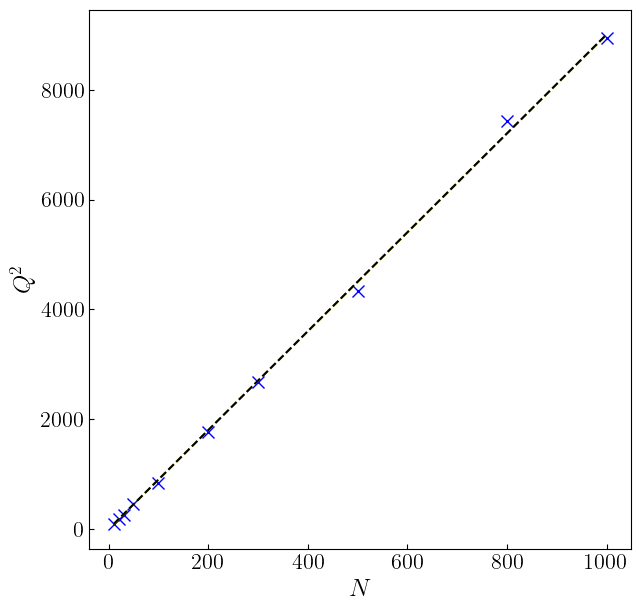

In [2]:
# Load packages for linear regression
from scipy.stats import linregress as linreg
import scipy.optimize as opt
# Necessary library for plotting
import matplotlib.pyplot as plt

# LaTeX compiler
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Function for linear regression
def func(x, a, b):
    return a*x + b

# Linear regression for Q2
slope, intercept, r_value, p_value, std_err = linreg(N_list, Q2_list)
print('Q2 slope = %.2f, intercept = %.2f, R_value = %.4f, p_value = %.4f, std_err = %.2f'%(slope, intercept, r_value, p_value, std_err))
# Print equation for linear regression
print('Q2 = %.2f * N + %.2f \n'%(slope, intercept))

# Linear regression for R2
slope, intercept, r_value, p_value, std_err = linreg(N_list, R2_list)
print('R2 slope = %.2f, intercept = %.2f, R_value = %.4f, p_value = %.4f, std_err = %.3f'%(slope, intercept, r_value, p_value, std_err))
print('R2 = %.2f * N + %.2f \n'%(slope, intercept))

# Function for fitting
def func_fit(x, a):
    return a*x

# Fit for Q2
popt_q2, pcov = opt.curve_fit(func_fit, N_list, Q2_list)
print('Q2 fit = %.2f'%(popt_q2[0]))
print('Q2 = %.2f * N\n'%(popt_q2[0]))

# Fit for R2
popt, pcov = opt.curve_fit(func_fit, N_list, R2_list)
print('R2 fit = %.2f'%(popt[0]))
print('R2 = %.2f * N'%(popt[0]))

# Figure plotting Q2 and R2 in function of N in subplots
plt.figure(figsize=(7,7))
plt.plot(N_list,Q2_list,'bx', markersize=8)
plt.plot(N_list,Q2_theory_list,'y--')
plt.plot(N_list,func_fit(np.array(N_list), popt_q2[0]),'k--')
plt.xlabel(r'$N$', fontsize=18)
plt.ylabel(r'$Q^2$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

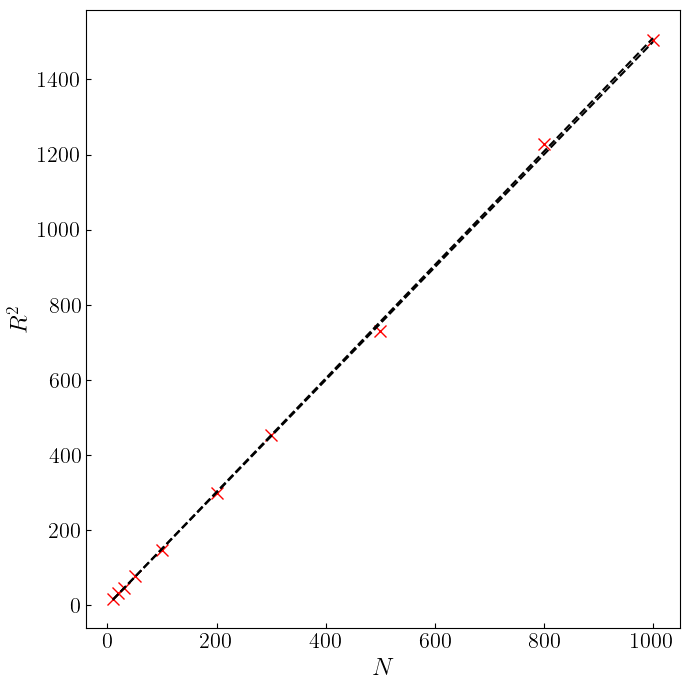

In [3]:
plt.figure(figsize=(7,7))
plt.plot(N_list,R2_list,'rx', markersize=8)
plt.plot(N_list,R2_theory_list,'k--')
plt.plot(N_list,func_fit(np.array(N_list), popt[0]),'k--')
plt.xlabel(r'$N$', fontsize=18)
plt.ylabel(r'$R^2$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.tight_layout()
plt.show()

### Comparison with theory

The done before, and say if the values obtained, theory and numerical, are compatible.